In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data1_path = 'data/Part1/Part1'
data2_path = 'data/Part2/Part2'

In [3]:
# Download the pretrained ResNet-50 model from torchvision
# and load it into the model.
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.eval()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
# Function to preprocess the image
def resnet_preprocessor(image):
    # Resize the image to 224x224
    image = cv2.resize(image, (224, 224))
    # Convert the image to a tensor
    image = torch.tensor(image).permute(2, 0, 1).float()
    # Normalize the image
    image = (image - 127.5) / 127.5
    # Add a batch dimension
    image = image.unsqueeze(0)
    return image

In [5]:
def extract_layer_features(
    model: torch.nn.Module,
    x: torch.Tensor,
    layer_name: str
) -> torch.Tensor:
    """
    Run x through model, grab the output of a specified layer via forward hook,
    then remove the hook and return the raw feature tensor.

    Args:
        model:        A PyTorch model (e.g. torchvision.models.resnet50(pretrained=True))
        x:            Input tensor of shape [B, C, H, W] (already preprocessed)
        layer_name:   Dot-separated layer name as in model.named_modules()

    Returns:
        Tensor: Output of the specified layer
    """
    # Store hooked output
    features = {}

    def _hook(module, inp, out):
        # Detach and store output
        features['feat'] = out.detach()

    # Find modules by name
    modules = dict(model.named_modules())
    if layer_name not in modules:
        raise ValueError(f"Layer '{layer_name}' not found in model.")
    
    # Register hook
    handle = modules[layer_name].register_forward_hook(_hook)

    # Forward pass
    with torch.no_grad():
        _ = model(x)

    # Remove hook
    handle.remove()

    # Return raw features
    return features.get('feat')

In [6]:
# Open image using OpenCV from data/Part1/Part1/brain_glioma/brain_glioma_0001.jpg
image = cv2.imread(f'{data1_path}/brain_glioma/brain_glioma_0001.jpg')
# Pass the image through the model and print the classification
image = resnet_preprocessor(image)
# Pass the image through the model
with torch.no_grad():  # Disable gradient calculation
    model.eval()  # Set the model to evaluation mode
    output = model(image)  # Forward pass
# Get the predicted class
_, predicted = torch.max(output, 1)
# Print the predicted class
print(f'Predicted class: {predicted.item()}')

Predicted class: 714


In [7]:
# Open image using OpenCV from data/Part1/Part1/brain_glioma/brain_glioma_0001.jpg
image = cv2.imread(f'{data1_path}/brain_glioma/brain_glioma_0001.jpg')
# Pass the image through the model and print the classification
image = resnet_preprocessor(image)
# Extract features from the 'avgpool' layer
features = extract_layer_features(model, image, 'avgpool')
# Print the shape of the features
print(f'Features shape: {features.shape}')  # e.g. torch.Size([1, 2048, 1, 1])

Features shape: torch.Size([1, 2048, 1, 1])


In [8]:
# Open image using OpenCV from data/Part1/Part1/brain_glioma/brain_glioma_0001.jpg
image = cv2.imread(f'{data1_path}/brain_glioma/brain_glioma_0001.jpg')
# Pass the image through the model and print the classification
image = resnet_preprocessor(image)
# Extract features from the 'avgpool' layer
features = extract_layer_features(model, image, 'layer3')
# Print the shape of the features
print(f'Features shape: {features.shape}')  # e.g. torch.Size([1, 2048, 1, 1])

Features shape: torch.Size([1, 1024, 14, 14])


In [9]:
# Open image using OpenCV from data/Part1/Part1/brain_glioma/brain_glioma_0001.jpg
image = cv2.imread(f'{data1_path}/brain_glioma/brain_glioma_0001.jpg')
# Pass the image through the model and print the classification
image = resnet_preprocessor(image)
# Extract features from the 'avgpool' layer
features = extract_layer_features(model, image, 'fc')
# Print the shape of the features
print(f'Features shape: {features.shape}')  # e.g. torch.Size([1, 2048, 1, 1])

Features shape: torch.Size([1, 1000])


Image shape: (10, 10)


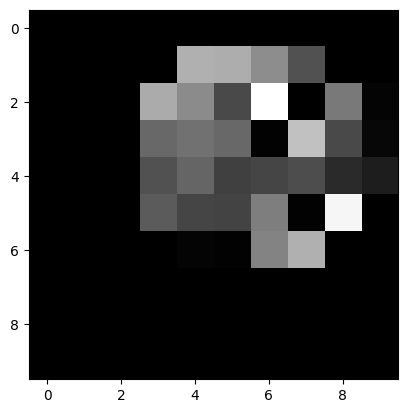

In [10]:
# Open image using OpenCV from data/Part1/Part1/brain_glioma/brain_glioma_0001.jpg
image = cv2.imread(f'{data1_path}/brain_glioma/brain_glioma_0001.jpg')
image = image[:, :, 0]
# Resize to 10*10
image = cv2.resize(image, (10, 10))

print(f'Image shape: {image.shape}')

# Show image using matplotlib
plt.imshow(image, cmap='gray')
plt.show()


Number of blocks: 100
Block shape: (30, 10)


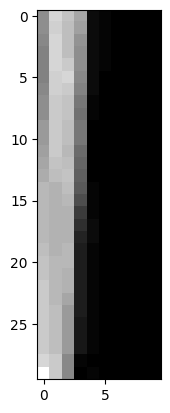

In [35]:
# Open image using OpenCV from data/Part1/Part1/brain_glioma/brain_glioma_0001.jpg
image = cv2.imread(f'{data1_path}/brain_glioma/brain_glioma_0002.jpg')
# Convert to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Resize the image to 300x100
image = cv2.resize(image, (300, 100))
# Partition the image into 10*10 blocks
blocks = []
# Divide the image into non-overlapping 30*10 blocks
for i in range(0, image.shape[0], 10):
    for j in range(0, image.shape[1], 30):
        block = image[i:i+10, j:j+30].T  # Transpose the block to get shape (30, 10)
        blocks.append(block)

print(f'Number of blocks: {len(blocks)}')
print(f'Block shape: {blocks[70].shape}')

# Show the 100th block using matplotlib
plt.imshow(blocks[70], cmap='gray')
plt.show()

In [12]:
def get_moments(image):
    """
    Calculate the first 3 moments of the image, mean, variance, and skewness.

    Args:
        image: Input image

    Returns:
        Tuple: Moments of the image
    """
    # Calculate the mean
    mean = np.mean(image)
    # Calculate the variance
    variance = np.var(image)
    # Calculate the skewness
    skewness = np.mean((image - mean) ** 3) / (variance ** 1.5) if variance != 0 else 0
    return np.array([mean, variance, skewness])

In [36]:
moments = []
# Compute moments for all blocks
for i, block in enumerate(blocks):
    # Compute the moments of the block
    block_moments = get_moments(block)
    # Append the moments to the list
    moments.append(block_moments)
# Convert moments to a numpy array
moments = np.array(moments)
print(moments.shape)
print(moments[70])

(100, 3)
[ 10.70666667 200.75395556   0.73580681]
